# Introduction

This is a movie recommender system from Explore-AI competition at Kaggle

## The importance of making recommendations

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Long_tail_problem.jpg"
     alt="The Long Tail Problem"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
The Long tail problem is often experienced by content distributors. 
</div>


We exist in a technological era where there is far too much content (movies, news articles, shopping products, websites, etc.) for individual items to receive our consideration. For example, consider that the average Google search returns well over 1 million results, yet when was the last time you looked at the websites past the [first page](https://backlinko.com/google-ctr-stats)?  This fact is often illustrated by what is known as the "long tail problem" (represented in the figure above), where tracking user engagement with items in a large content repository sees a small number of these items receiving a disproportionate amount of attention. In contrast, the majority of items remain unexplored. The truth is that a user doesn't know of each item that exists, nor has the time to inspect each item even if it were known. 

In light of the above challenge, a natural question for service providers becomes: "How do I ensure that an individual is shown a manageable portion of the total content I have available while also ensuring that this content is relevant to and desired by them?" This question turns out to be extremely valuable, both economically and within society. Luckily for us, decades of hard work by very intelligent individuals have largely answered this question through a collection of algorithms and computing techniques known as recommender systems.


Simply put, a recommender system functions by predicting a user’s rating or preference for an item. This allows a service provider to build up a catalogue of items it believes the user will want to examine, thereby increasing their engagement with the service and allowing a wider array of content to be considered.

### Terminology: Users, items, and ratings  

The first thing we need to do when discussing recommender systems is to clarify some terminology. A recommender system has two primary sets of entities: the users and the items.

As we’d expect, **an item is consumed**. It can be watched, read, bought, clicked on, or considered. Items are passive, meaning that their properties or nature do not change.

**Users are individuals who interact with the items in a recommendation system.  Users create ratings for specific items within a recommendation system through their actions.** Ratings can be either *explicit* (such as giving your favourite movie 5/5 stars on a review) or *implicit* (such as watching a movie; even though you haven't rated it directly, by viewing something, you indicate that you have some interest in it).

A given user can have ratings for many items in the system or none at all. Generally, as a user continues to interact with a recommender system, it can capture her preferences and ratings for items more easily.

## Measuring similarity 

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Cosine_similarity.jpg"
     alt="Cosine Similarity "
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Measuring the similarity between the ratings of two users (A) and (B) for the books 'Harry Potter and the Philosopher's Stone' and 'The Diary of a Young Girl', using the Cosine similarity metric.  
</div>


Having learnt about the entities which exist within recommender systems, we may wonder how they function. One fundamental principle we need to understand is that recommender systems are built up by utilising the _existing relations_ between items and users. As such, these systems always require a mechanism to measure how related or _similar_ a user is to another user or an item is to another item. 

We accomplish this similarity measurement through, a _similarity metric_.  

Generally speaking, a similarity metric can be considered the inverse of a distance measure. If two things are considered very similar, they should be assigned a high similarity value (close to 1), while dissimilar items should receive a low similarity value (close to zero).  Other [important properties](https://online.stat.psu.edu/stat508/lesson/1b/1b.2/1b.2.1) include:
 - (Symmetry) $Sim(A,B) = Sim(B,A)$ 
 - (Identity) $Sim(A,A) = 1$
 - (Uniqueness) $Sim(A,B) = 1 \leftrightarrow A = B$
 
While there are many similarity metrics to choose from when building a recommender system (and more than one can certainly be used simultaneously), a popular choice is the **Cosine similarity**. We won't go into the fundamental trig here, but recall that as an angle becomes smaller (approaching $0^o$), the value of its cosine increases. Conversely, as the angle increases, the cosine value decreases. It turns out that this behaviour makes the cosine of the angle between two p-dimensional vectors desirable as a [similarity metric](https://en.wikipedia.org/wiki/Cosine_similarity) which can easily be computed.

Using the figure above to help guide our understanding, the Cosine similarity between two p-dimensional vectors ${A}$ and $B$ can be given as:

$$ \begin{align}
Sim(A,B)  &= \frac{A \cdot B}{||A|| \times ||B||} \\ \\
& = \frac{\sum_{i=1}^{p}A_{i}B_{i}}{\sqrt{{\sum_{i=1}^{p}A_{i}^2}} \sqrt{\sum_{i=1}^{p}B_{i}^2}}, \\
\end{align} $$ 
  

Let’s work out the cosine similarity using the above example to make things a little more concrete. Here, each vector represents the ratings given by one of two *users*, $A$ and $B$, who have each rated two books (rating#1 $ \rightarrow r_1$, and rating#2 $ \rightarrow r_2$). To work out how similar these two users are based on their supplied ratings, we can use the Cosine similarity definition as follows:   


$$ \begin{align}
Sim(A,B)  & = \frac{(A_{r1} \times B_{r1})+(A_{r2} \times B_{r2})}{\sqrt{A_{r1}^2 + A_{r2}^2} \times \sqrt{B_{r1}^2 + B_{r2}^2}} \\ \\
& = \frac{(3 \times 5) + (4 \times 2)}{\sqrt{9 + 16} \times \sqrt{25 + 4}} \\ \\
& = \frac{23}{26.93} \\ \\
& = 0.854
\end{align} $$

It would be a pain to work this out manually each time! Thankfully, we can obtain the same result using the `cosine_similarity` function provided to us in `sklearn`.

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity 

In [2]:
A = np.array([[3,4]]) # <-- Rating vector A
B = np.array([[5,2]]) # <-- Rating vector B
cosine_similarity(A,B) # Sim(A,B)

array([[0.85419856]])

# Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now we get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has been enriched with additional data.

## Source

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

## Supplied Files

- `genome_scores.csv` - a score mapping the strength between movies and tag-related properties. Read more [here](https://files.grouplens.org/papers/tag_genome.pdf).
- `genome_tags.csv` - user-assigned tags for genome-related scores.
- `imdb_data.csv` - Additional movie metadata scraped from IMDB using the `links.csv` file.
- `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- `sample_submission.csv` - Sample of the submission format for the hackathon.
- `tags.csv` - User-assigned tags for the movies within the dataset.
- `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
- `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

## Additional Information

The below information is provided directly from the MovieLens dataset description files:

### Ratings Data File Structure (`train.csv`)

All ratings are contained in the file `train.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId,movieId,rating,timestamp

The lines within this file are ordered first by `userId`, then, within user, by `movieId`.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Tags Data File Structure (`tags.csv`)

All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format: userId,movieId,tag,timestamp

Movie titles are entered manually or imported from [The Movie Database (TMDb)](https://www.themoviedb.org/), and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

- Action
- Adventure
- Animation
- Children's
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western
- (no genres listed)

### Links Data File Structure (`links.csv`)

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format: movieId,imdbId,tmdbId

- `movieId` is an identifier for movies used by [MovieLens](https://movielens.org). E.g., the movie Toy Story has the link [https://movielens.org/movies/1](https://movielens.org/movies/1).

- `imdbId` is an identifier for movies used by [IMDB](http://www.imdb.com). E.g., the movie Toy Story has the link [http://www.imdb.com/title/tt0114709/](http://www.imdb.com/title/tt0114709/).

- `tmdbId` is an identifier for movies used by [The Movie Database (TMDb)](https://www.themoviedb.org). E.g., the movie Toy Story has the link [https://www.themoviedb.org/movie/862](https://www.themoviedb.org/movie/862).

Use of the resources listed above is subject to the terms of each provider.

### Tag Genome (`genome-scores.csv` and `genome-tags.csv`)

As described in [this article](https://dl.acm.org/doi/10.1145/1864708.1864767), the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files:

- The file `genome-scores.csv` contains movie-tag relevance data in the following format: movieId,tagId,relevance
- The second file, `genome-tags.csv`, provides the tag descriptions for the tag IDs in the genome file, in the following format: tagId,tag

## Installing packages
Please download all relevant packages in. There is no terminal so you will pip install everything.

You can find a list of recommended install in the `requirements.txt` file.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Reading in data

In [80]:
train_df = pd.read_csv('alx-movie-recommendation-project-2024/train.csv')
movies_df = pd.read_csv('alx-movie-recommendation-project-2024/movies.csv')
imdb_df = pd.read_csv('alx-movie-recommendation-project-2024/imdb_data.csv')
test_df = pd.read_csv('alx-movie-recommendation-project-2024/test.csv')
links_df = pd.read_csv('alx-movie-recommendation-project-2024/links.csv')
tags = pd.read_csv('alx-movie-recommendation-project-2024/tags.csv')
genome_scores = pd.read_csv('alx-movie-recommendation-project-2024/genome_scores.csv')
genome_tags = pd.read_csv('alx-movie-recommendation-project-2024/genome_tags.csv')
sample_submissions = pd.read_csv('alx-movie-recommendation-project-2024/sample_submission.csv')

## The dataset will not be included in the rebo due to it's large size
#### You can download it from [Kaggle](https://www.kaggle.com/competitions/alx-movie-recommendation-project-2024/data)

## EDA


### Outliers
- **Identify outliers**: Outliers are data points that differ significantly from other observations. They can skew and mislead the training process of a machine learning model.
- **Detecting outliers**: Use statistical methods such as Z-scores or IQR (Interquartile Range) to detect outliers.
- **Handling outliers**: Decide whether to remove or transform the outliers depending on their impact on the dataset.

### Understanding Relationships Between Various Attributes and Structure of the Data
- **Correlation Analysis**: Use correlation matrices to understand the relationships between numerical attributes.
- **Visualization Techniques**: Employ scatter plots, pair plots, and heatmaps to visualize and explore relationships.
- **Data Structure**: Understand the structure of the data, including the distribution of values and the presence of any missing values.

### Recognizing Important Variables
- **Feature Importance**: Use techniques like Random Forests, Gradient Boosting, or SHAP values to determine feature importance.
- **Domain Knowledge**: Incorporate domain expertise to identify which variables are likely to be important.
- **Statistical Tests**: Conduct statistical tests to identify variables that have significant effects on the target variable.

By understanding the data through these steps, we ensure a robust foundation for building and evaluating machine learning models.


**Lets explore the head of the data first**

In [60]:
print(train_df.shape)
train_df.head()

(10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [61]:
print(test_df.shape)
test_df.head()

(5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


## It appeares that the train set has 10M rating and the test set has 5M rating
But we will not be using the test set because we do not has the ground truth values and it requires predict the ratings for the movies and submit it to the competition to view the results, instead we will split the train set to a trian and a test sets

In [62]:
print(movies_df.shape)
movies_df.head()

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
print(links_df.shape)
links_df.head()

(62423, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [76]:
print(imdb_df.shape)
imdb_df.head()

(27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [68]:
print(genome_scores.shape)
genome_scores.head()

(15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [123]:
print(genome_tags.shape)
genome_tags

(1128, 2)


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


**Lets Check whether or not we have any missing values in our dataset**

In [70]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           27278
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


### We notice that the links_df has 107 missing value and imdb_df has a lot of missing values
Given that the number of rows of links_df is 62423 we can remove the rows with missing values.

In [71]:
links_df = links_df.dropna()
print(links_df.shape)

(62316, 3)


### Now lets check for dublicates

In [14]:
# Check for duplicate rows
print("Duplicate rows in Train: ")
print(train_df.duplicated().sum())
print("************")
print("Duplicate rows in Test: ")
print(test_df.duplicated().sum())
print("************")
print("Duplicate rows in Movies: ")
print(movies_df.duplicated().sum())
print("************")
print("Duplicate rows in Links: ")
print(links_df.duplicated().sum())
print("************")
print("Duplicate rows in IMDB: ")
print(imdb_df.duplicated().sum())
print("************")
print("Duplicate rows in Genome scores: ")
print(genome_scores.duplicated().sum())
print("************")
print("Duplicate rows in Genome tags: ")
print(genome_tags.duplicated().sum())

Duplicate rows in Train: 
0
************
Duplicate rows in Test: 
0
************
Duplicate rows in Movies: 
0
************
Duplicate rows in Links: 
0
************
Duplicate rows in IMDB: 
0
************
Duplicate rows in Genome scores: 
0
************
Duplicate rows in Genome tags: 
0


## Lets start by the train_df and movies_df

To identify potential outliers:

- **RV (Right Value or Lower Bound)**: This is calculated as 
  \[
  RV = Q1 - 1.5 * IQR
  \]
  Any data point below this value is considered an outlier.

- **LV (Left Value or Upper Bound)**: This is calculated as 
  \[
  LV = Q3 + 1.5 * IQR
  \]
  Any data point above this value is considered an outlier.


In [15]:
Q1 = train_df['rating'].quantile(.25)
Q3 = train_df['rating'].quantile(.75)
IQR = Q3 - Q1 
IQR

1.0

In [16]:
RV = Q1 - (1.5*IQR)
LV = Q3 + (1.5 *IQR) 
RV,LV

(1.5, 5.5)

In [17]:
train_df['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Lets use box plot to visualise this information

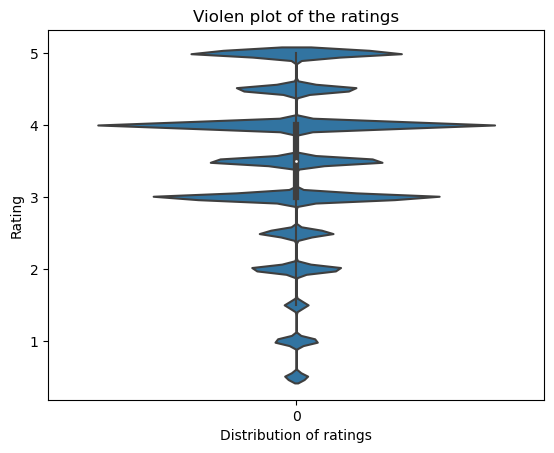

In [18]:
sns.violinplot(train_df['rating'])
plt.title("Violen plot of the ratings")
plt.xlabel("Distribution of ratings")
plt.ylabel('Rating')
plt.show()

### Key Features of the Violin Plot

- **Shape**: The shape of the violin plot indicates the density of the ratings at different values. The wider sections represent a higher density of ratings, while the narrower sections indicate lower density.

- **Central Line**: There is a line in the center of the violin that represents the median rating. This gives us a quick reference for the central tendency of the ratings.

- **Distribution**: The plot shows the distribution of ratings, allowing us to see if there are multiple peaks (modes), which might suggest that different groups of users rate the movies differently.

- **Outliers**: The plot may also show potential outliers, which are ratings significantly different from the majority. Outliers can be identified visually as points outside the main body of the plot.

- **Range**: The vertical extent of the violin indicates the range of ratings.

**Lets sort the movies by rating and see which movie has the highest mean of ratings.**

In [19]:
merged_df = train_df.merge(movies_df, left_on='movieId', right_on='movieId')
merged_df.shape

(10000038, 6)

In [20]:
# Calculate the average rating for each title
average_ratings = merged_df.groupby('title')['rating'].mean()

# Sort the average ratings in descending order
sorted_average_ratings = average_ratings.sort_values(ascending=False)

# Create a DataFrame from the sorted average ratings
df = pd.DataFrame(sorted_average_ratings).reset_index()
df.columns = ['title', 'average_rating']

# Display the DataFrame
print(df)

                                    title  average_rating
0                   Which Way Home (2009)             5.0
1                    Kaakha Kaakha (2003)             5.0
2               Not Quite Human II (1989)             5.0
3                   Selling Isobel (2018)             5.0
4                            Sehar (2005)             5.0
...                                   ...             ...
48146  Down and Out with the Dolls (2001)             0.5
48147                 The Informer (2019)             0.5
48148           Dough and Dynamite (1914)             0.5
48149            Ideal Husband, An (1947)             0.5
48150            Dopo quella notte (2010)             0.5

[48151 rows x 2 columns]


Looks like there are couple of movies which are highly rated! But holdon is it really worth it to watch them by just taking out the mean ?, My Answer would be Strictly NOOOO!!!!. If you would ask me why then bare with me for the answer.

**Lets explore how many no. of people actually gave ratings to a specific movie.**

In [21]:
# Count the total number of ratings for each title
total_ratings = merged_df['title'].value_counts()

# Merge the total ratings with the average ratings DataFrame
df = df.merge(total_ratings.rename('total_ratings'), on='title')

In [22]:
df

,title,average_rating,total_ratings
0,Which Way Home (2009),5.0,1
1,Kaakha Kaakha (2003),5.0,1
2,Not Quite Human II (1989),5.0,1
3,Selling Isobel (2018),5.0,1
4,Sehar (2005),5.0,1
...,...,...,...
48146,Down and Out with the Dolls (2001),0.5,1
48147,The Informer (2019),0.5,1
48148,Dough and Dynamite (1914),0.5,1
48149,"Ideal Husband, An (1947)",0.5,1


As you can see most of the movies that seemed to have highest Average rating which we rejected to watch on as we can see from these results that not even 5 people have rated it!!! Thats the reason the Counts are essential and lets visualize them using Python Libraries.

Lets first create a dataframe and then would probably build a joint plot to know the relationships between the Mean Ratings and the number of people rated it.

In [23]:
new_data=pd.DataFrame(merged_df.groupby(by='title')['rating'].mean())
new_data.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [24]:
new_data['No. of people Rated']=merged_df.groupby(by='title')['rating'].count()
new_data

,rating,No. of people Rated
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5
...,...,...
به نام پدر,3.250000,2
…And the Fifth Horseman Is Fear (1965),3.000000,1
チェブラーシカ (2010),2.000000,3


In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48151 entries, "BLOW THE NIGHT!" Let's Spend the Night Together (1983) to 줄탁동시 (2012)
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               48151 non-null  float64
 1   No. of people Rated  48151 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.1+ MB


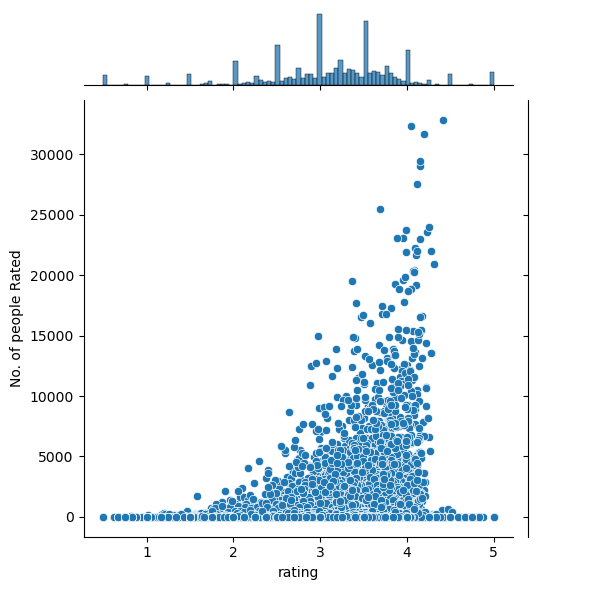

In [26]:
sns.jointplot(x=new_data['rating'], y=new_data['No. of people Rated']);

This clearly shows that the Movies with ratings in the range of 3 to 4.5 has the most number of ratings. Movies with almost 5 star ratings has around 10 or 20 number of ratings to it except for some few movies that has a high rating and a high number of ratings.

<Axes: xlabel='rating', ylabel='Density'>

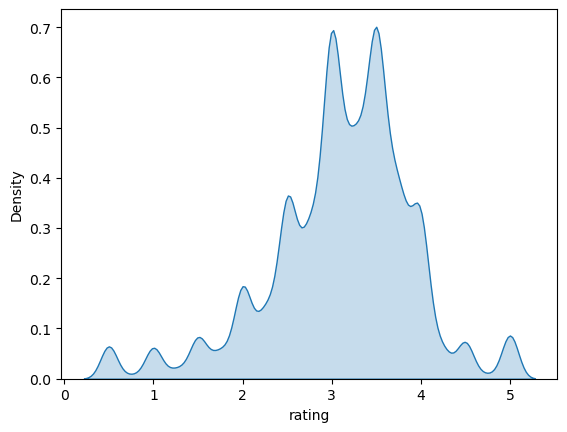

In [85]:
sns.kdeplot(data=new_data['rating'], shade=True)

In [27]:
df1 = train_df['rating']>5
df1.value_counts()

rating
False    10000038
Name: count, dtype: int64

In [28]:
df2 = train_df['rating']<1.5
df2.value_counts()

rating
False    9531254
True      468784
Name: count, dtype: int64

In [29]:
# Filter and print the rows where 'rating' < 1.5
outlier_rows = train_df[train_df['rating'] < 1.5]
outlier_rows = outlier_rows.merge(movies_df, left_on='movieId', right_on='movieId')

# Count occurrences of each title where rating <= 1.5
rating_counts = outlier_rows['title'].value_counts()
rating_counts.head(10)

title
Dumb & Dumber (Dumb and Dumber) (1994)              1841
Ace Ventura: Pet Detective (1994)                   1733
Ace Ventura: When Nature Calls (1995)               1600
Star Wars: Episode I - The Phantom Menace (1999)    1170
Blair Witch Project, The (1999)                     1147
Waterworld (1995)                                   1120
Batman & Robin (1997)                               1087
Wild Wild West (1999)                               1075
Titanic (1997)                                      1042
Natural Born Killers (1994)                         1030
Name: count, dtype: int64

### Interpretation of Rating Counts Below or Equal to 1.5

**High Count Titles:**
Movies like "Dumb & Dumber (Dumb and Dumber) (1994)" and "Ace Ventura: Pet Detective (1994)" have very high counts (1841 and 1733, respectively). This suggests that a significant number of users rated these movies poorly, possibly indicating widespread dissatisfaction or differing expectations regarding the quality of these films.

**Low Count Titles:**
Some movies have a count of just 1, such as "Hum Saath Saath Hain (1999)" and "Dinner with Friends (2001)." This suggests that very few users rated these movies below or equal to 1.5, indicating they might not have been rated by many viewers, or the viewers who did rate them generally found them acceptable or better.

**Understanding Ratings:**
A rating of 1.5 or lower is generally considered poor. The high counts for some titles could reflect:
- A strong negative sentiment among viewers.
- Potentially polarizing content that some viewers disliked, while others might have rated it higher.


In [30]:
total_ratings = merged_df['title'].value_counts()
# Get the total ratings for the specified movies
top_titles = rating_counts.head(10).index.tolist()
total_ratings_for_interest = total_ratings[total_ratings.index.isin(top_titles)]

# Display the total ratings for each movie
print(total_ratings_for_interest)

title
Ace Ventura: Pet Detective (1994)                   14941
Titanic (1997)                                      14890
Star Wars: Episode I - The Phantom Menace (1999)    12925
Dumb & Dumber (Dumb and Dumber) (1994)              12761
Waterworld (1995)                                   10913
Natural Born Killers (1994)                          9208
Ace Ventura: When Nature Calls (1995)                8702
Blair Witch Project, The (1999)                      7693
Wild Wild West (1999)                                4601
Batman & Robin (1997)                                4038
Name: count, dtype: int64


In [31]:
# Calculate outlier counts (ratings <= 1.5)
rating_counts = merged_df[merged_df['rating'] <= 1.5]['title'].value_counts()

# Calculate total counts of ratings for each movie
total_ratings = merged_df['title'].value_counts()

# Create a DataFrame for comparison
ratings_comparison = pd.DataFrame({
    'outlier_count': rating_counts,
    'total_count': total_ratings
}).fillna(0)

# Display the ratings comparison
ratings_comparison.head(30)

,outlier_count,total_count
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",0.0,1
"""Great Performances"" Cats (1998)",20.0,67
#1 Cheerleader Camp (2010),2.0,5
#Female Pleasure (2018),0.0,1
#FollowMe (2019),2.0,5
#Horror (2015),2.0,8
#Lucky Number (2015),0.0,1
#Stuck (2014),1.0,1
#realityhigh (2017),1.0,7


### We notice that the number of low ratings increase when the number of total ratings increas
**So we can cosider this as a variation of taste**

And based on the previous analysis we can consider the movies that has a count of rating below 1.5 as realy bad movies so we can not consider them as outliers

## Now we can look at the distripution of the ratings closely.

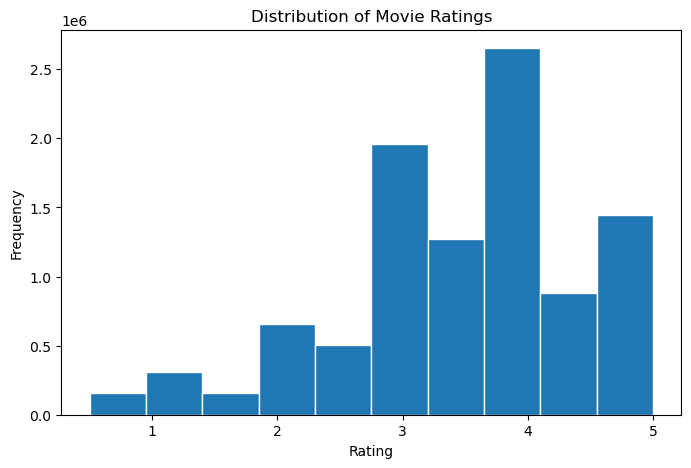

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(train_df['rating'], bins=10, edgecolor='white')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

## Most Popular Movies (Top 10)

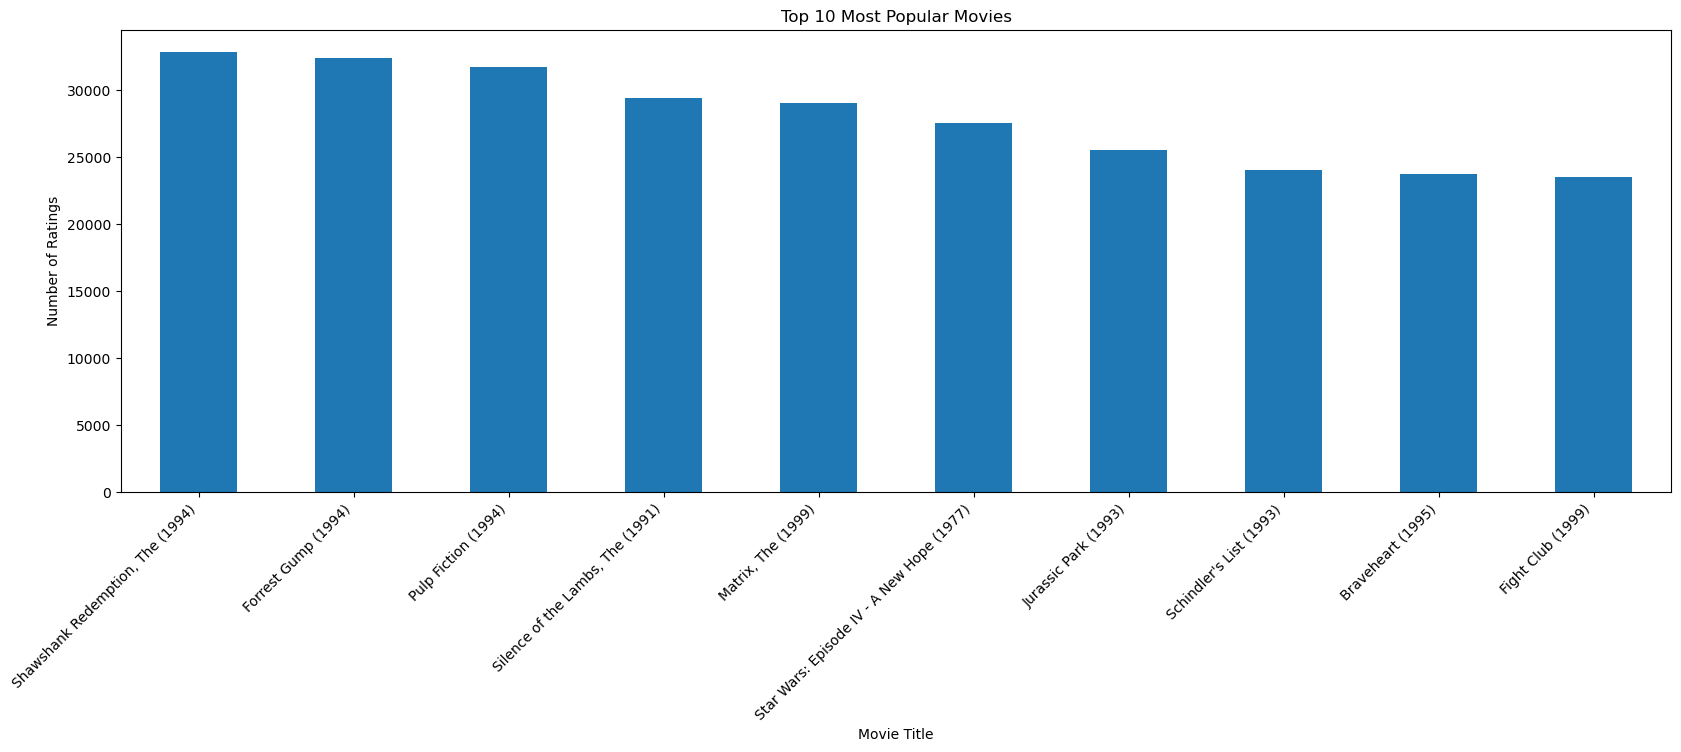

In [33]:
top_movies = merged_df['title'].value_counts().nlargest(10)
plt.figure(figsize=(20, 6))
top_movies.plot(kind='bar')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Popular Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

## Distribution of Movie Genres

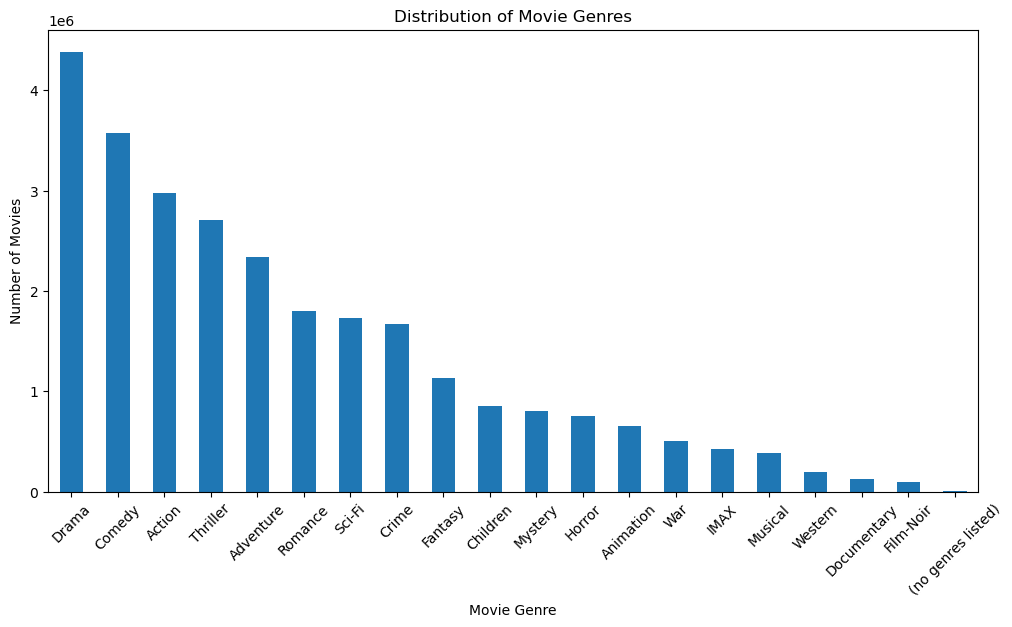

In [34]:
merged_df['genres'] = merged_df['genres'].str.split('|')
exploded_genres = merged_df.explode('genres')

# Get the value counts for each genre (excluding NaN values)
genres_counts = exploded_genres['genres'].value_counts()

plt.figure(figsize=(12, 6))
genres_counts.plot(kind='bar')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45)
plt.show()

In [35]:
exploded_genres.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy
0,5163,57669,4.0,1518349992,In Bruges (2008),Crime
0,5163,57669,4.0,1518349992,In Bruges (2008),Drama
0,5163,57669,4.0,1518349992,In Bruges (2008),Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy


## Number of Ratings per User

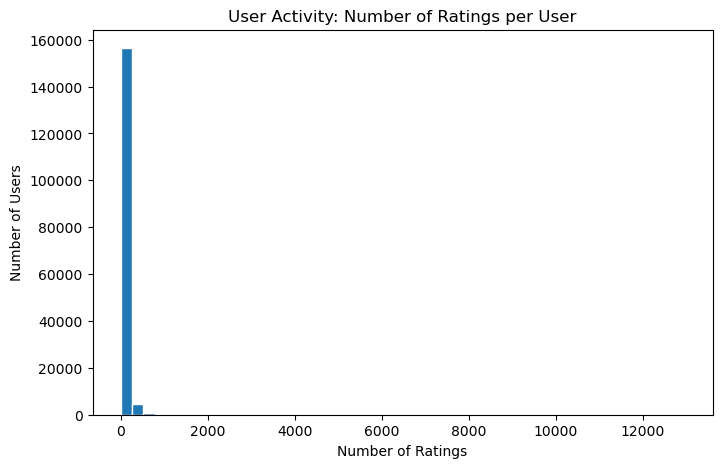

In [36]:
user_rating_counts = merged_df['userId'].value_counts()
plt.figure(figsize=(8, 5))
plt.hist(user_rating_counts, bins=50, edgecolor='white')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('User Activity: Number of Ratings per User')
plt.show()

**I think that is enough for the train_df and movies_df**

## Now lets dive in the imdb_df

In [155]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [156]:
# Remove dollar signs and commas
imdb_df['budget'] = imdb_df['budget'].str.replace('$', '').str.replace(',', '')

# Convert to numeric
imdb_df['budget'] = pd.to_numeric(imdb_df['budget'], errors='coerce')

# Recalculate summary statistics
print(imdb_df['budget'].describe())


count    6.426000e+03
mean     2.574486e+07
std      3.510677e+07
min      0.000000e+00
25%      3.500000e+06
50%      1.300000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64


#### Keep in mind that the imdb_df has a lot of missing valus so I doubt this would be an indicator for any thing

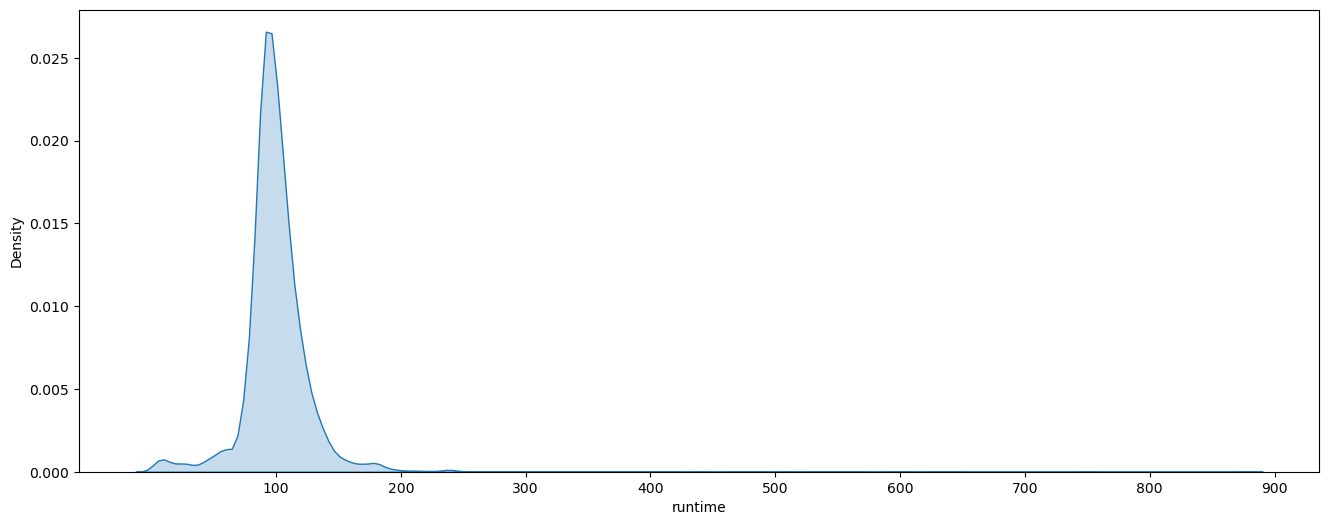

In [157]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=imdb_df['runtime'], shade=True)
plt.xticks([100*i for i in range(1, 10)]);

**We can see that a good amount of the movies are among the duration of 75-120 mins.**

In [158]:
imdb_df['director'] = imdb_df['director'].replace('See full summary', 'The director name was not provided')

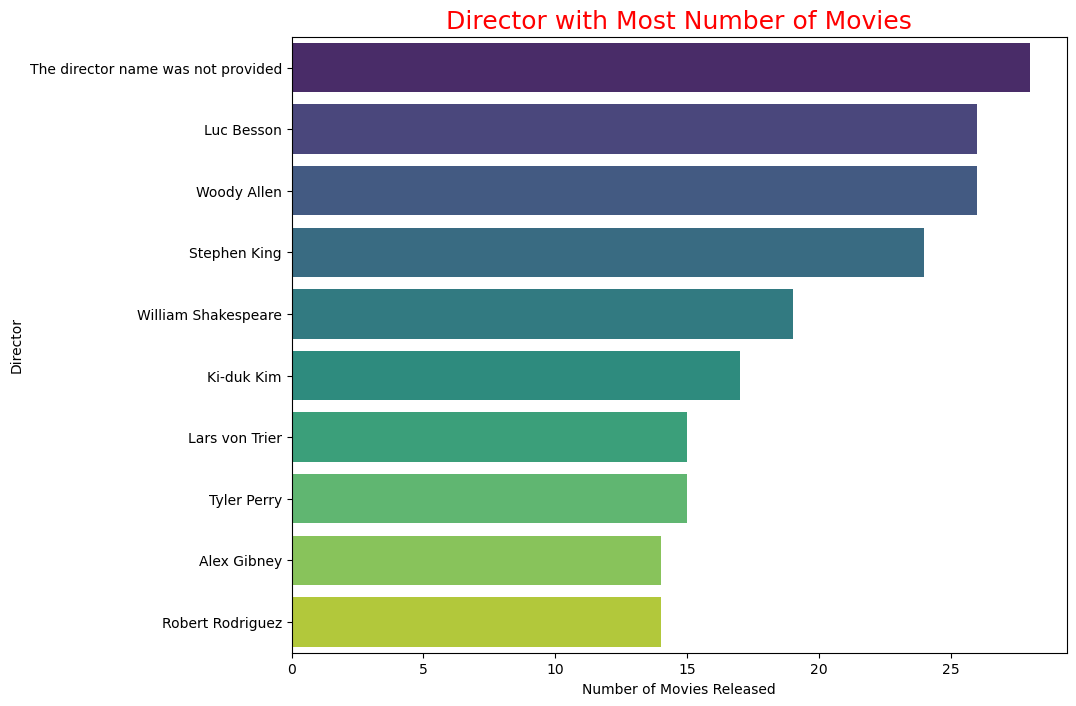

In [159]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Get the top 10 directors by movie count
top_directors = imdb_df.director.value_counts().sort_values(ascending=False)[:10]

# Create the bar plot
sns.barplot(y=top_directors.index, x=top_directors.values, palette='viridis')

# Set the title and labels
plt.title('Director with Most Number of Movies', color='red', fontsize=18)
plt.xlabel('Number of Movies Released')
plt.ylabel('Director')

# Show the plot
plt.show()

In [160]:
actors = imdb_df['title_cast'].str.split('|').explode()
actors

0             Tom Hanks
0             Tim Allen
0           Don Rickles
0            Jim Varney
0         Wallace Shawn
              ...      
27277       Mikal Evans
27277    Daniel Zovatto
27277     Evelina Turen
27277     Rachel Heller
27277       Noelle Beck
Name: title_cast, Length: 249358, dtype: object

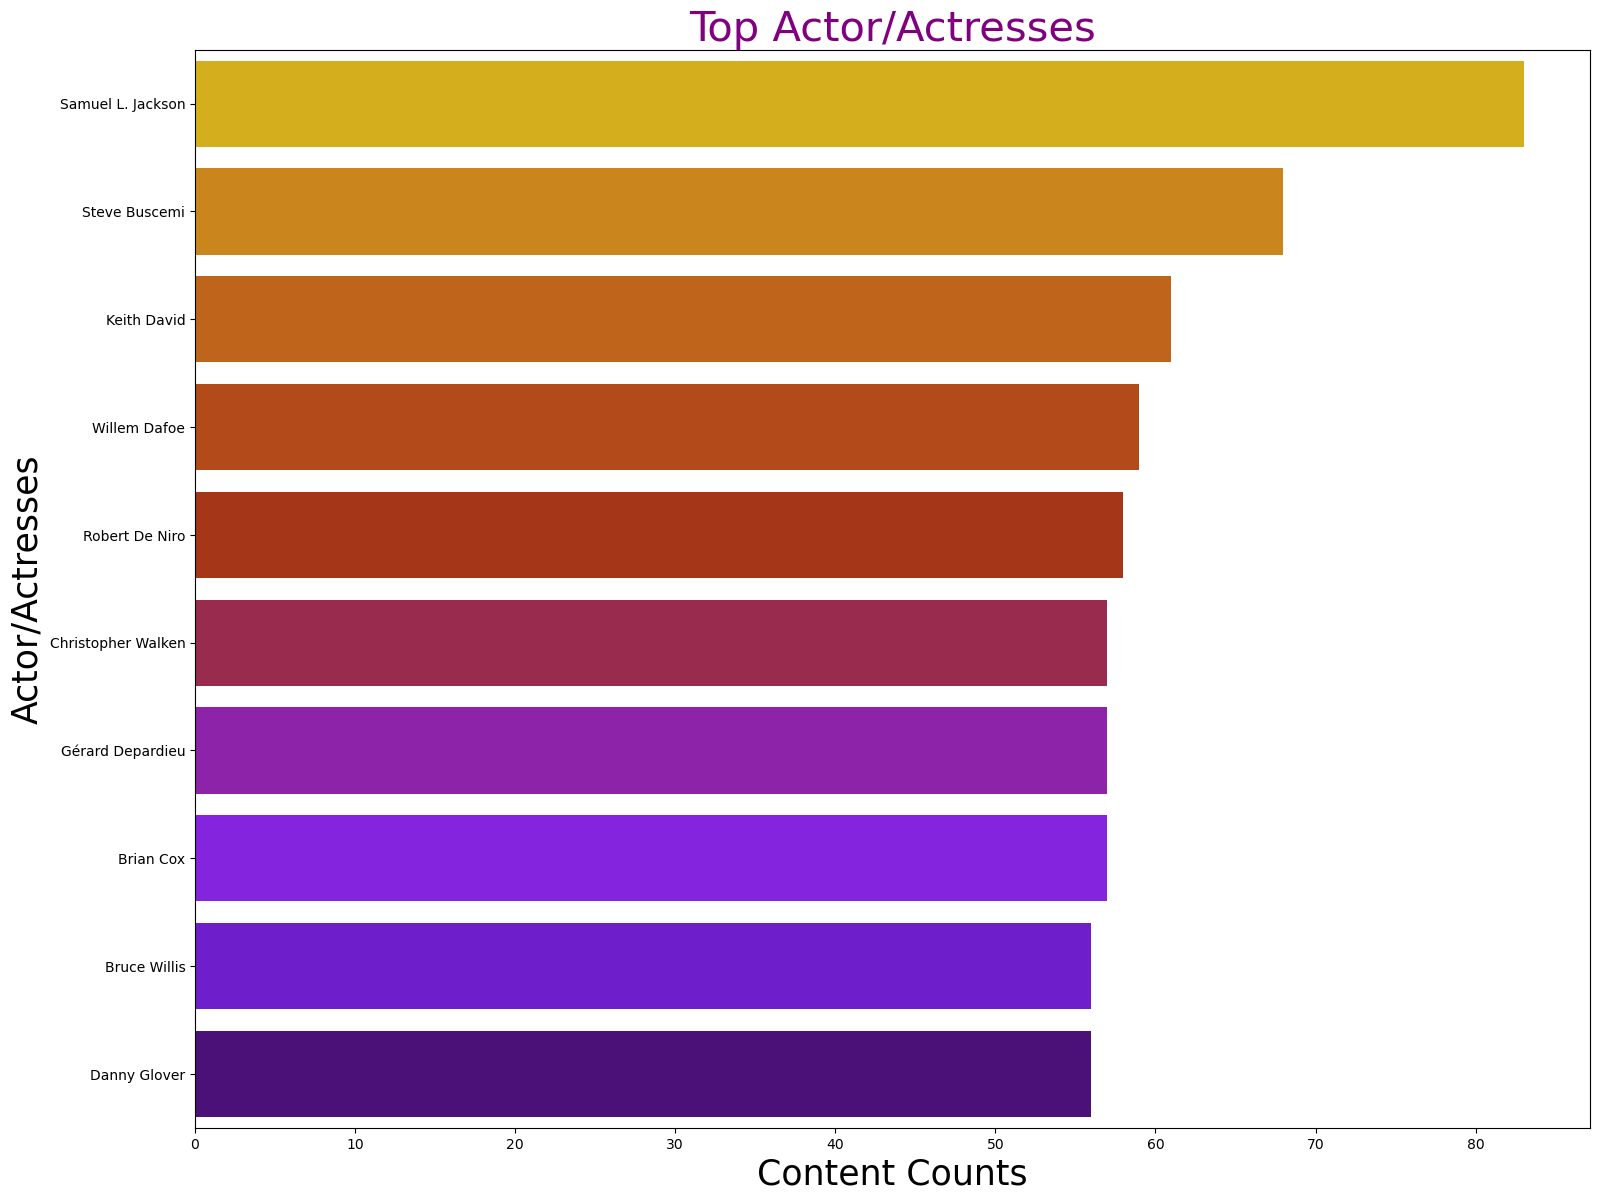

In [161]:
# Set the size of the figure
plt.figure(figsize=(18, 14))

# Get the top 10 actors/actresses by appearance count
top_actors = actors.value_counts().sort_values(ascending=False)[:10]

# Create the bar plot
sns.barplot(y=top_actors.index, x=top_actors.values, palette='gnuplot_r')

# Set the title and labels
plt.title('Top Actor/Actresses', color='purple', fontsize=30)
plt.ylabel('Actor/Actresses', fontsize=25)
plt.xlabel('Content Counts', fontsize=25)

# Show the plot
plt.show()

Actor `Samuel L. jackson` has highest number of movies which make sense.

### Now lets look at what we can do with the genome data

In [ ]:
# Merge genome data
merged_genome = pd.merge(genome_scores, genome_tags, on='tagId', how='left')

In [ ]:
merged_genome

In [ ]:
# Pivot the DataFrame
pivot_df = merged_genome.pivot(index='movieId', columns='tag', values='relevance')

In [ ]:
pivot_df

In [ ]:
# Check for NaN values and print index
for col in pivot_df.columns:
    if pivot_df[col].isna().sum() > 0:
        print(f"Column '{col}' contains NaN values at indices: {pivot_df.index[pivot_df[col].isna()]}")
    else:
        print(f"Column '{col}' contains no NaN values")